In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('GenderBasedEmploymentInPakistan2023.csv')

In [24]:
df

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300
...,...,...,...,...,...,...,...,...
4725,Sindh,Hyderabad Division,Matiri,Total Population,Urban,182669,94445,88207
4726,Sindh,Banbhore Division,Thattah,Total Population,Rural,654818,340701,314105
4727,Sindh,Banbhore Division,Thattah,Total Population,Urban,176476,90900,85556
4728,Balochistan,Quetta Division,Lorali,Total Population,Rural,332532,176186,156332


In [25]:
df.describe()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
count,4730,4730,4730,4730,4730,4730,4730,4730
unique,4,30,131,20,3,1838,1848,1626
top,Punjab,Quetta Division,Thattah,Total Population,Rural,-,-,-
freq,1334,400,38,276,2103,322,343,742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   4730 non-null   object
 1   Division   4730 non-null   object
 2   District   4730 non-null   object
 3   Indicator  4730 non-null   object
 4   Area Type  4730 non-null   object
 5   Total      4730 non-null   object
 6   Male       4730 non-null   object
 7   Female     4730 non-null   object
dtypes: object(8)
memory usage: 295.8+ KB


In [12]:
from sklearn.cluster import KMeans
# Group the data by 'Province'
grouped = df.groupby('Province')

# Create an empty DataFrame to store the cluster labels for each province
all_cluster_labels = pd.DataFrame()

# Perform KMeans clustering for each province
for name, group in grouped:
    data_for_clustering = group[['Total', 'Male', 'Female']].apply(pd.to_numeric, errors='coerce').dropna()
    kmeans = KMeans(n_clusters=5, random_state=0).fit(data_for_clustering)
    cluster_labels = pd.DataFrame(kmeans.labels_, columns=['Cluster'], index=data_for_clustering.index)
    all_cluster_labels = pd.concat([all_cluster_labels, cluster_labels])

# Merge the cluster labels back to the original DataFrame
df = df.merge(all_cluster_labels, left_index=True, right_index=True, how='left', suffixes=('', '_Province'))

# Display the dataframe with cluster labels
df.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female,Cluster
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000,2.0
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000,0.0
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100,0.0
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300,0.0
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300,0.0


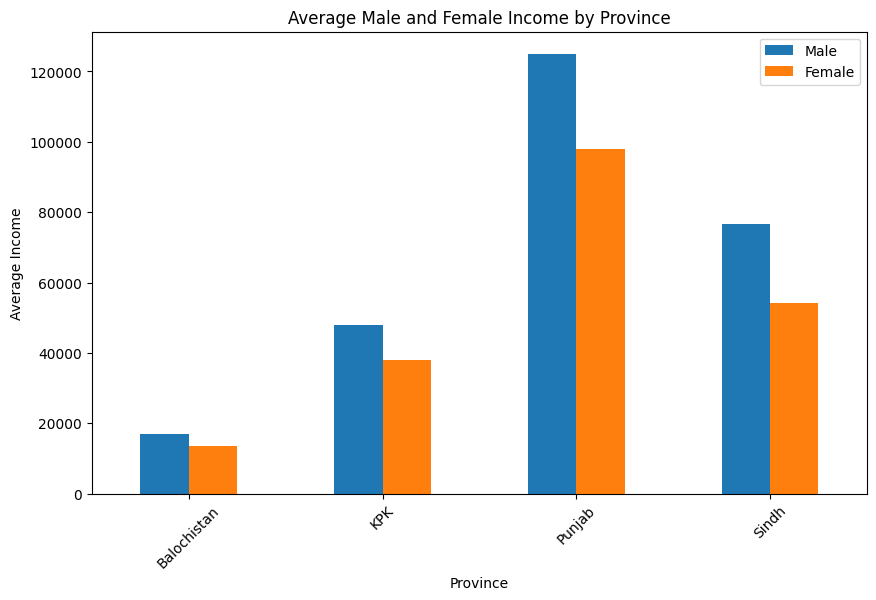

In [13]:
df['Male'] = pd.to_numeric(df['Male'], errors='coerce')
df['Female'] = pd.to_numeric(df['Female'], errors='coerce')

average_income = df.groupby('Province')[['Male', 'Female']].mean()

average_income.plot(kind='bar', figsize=(10, 6))
plt.title('Average Male and Female Income by Province')
plt.xlabel('Province')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

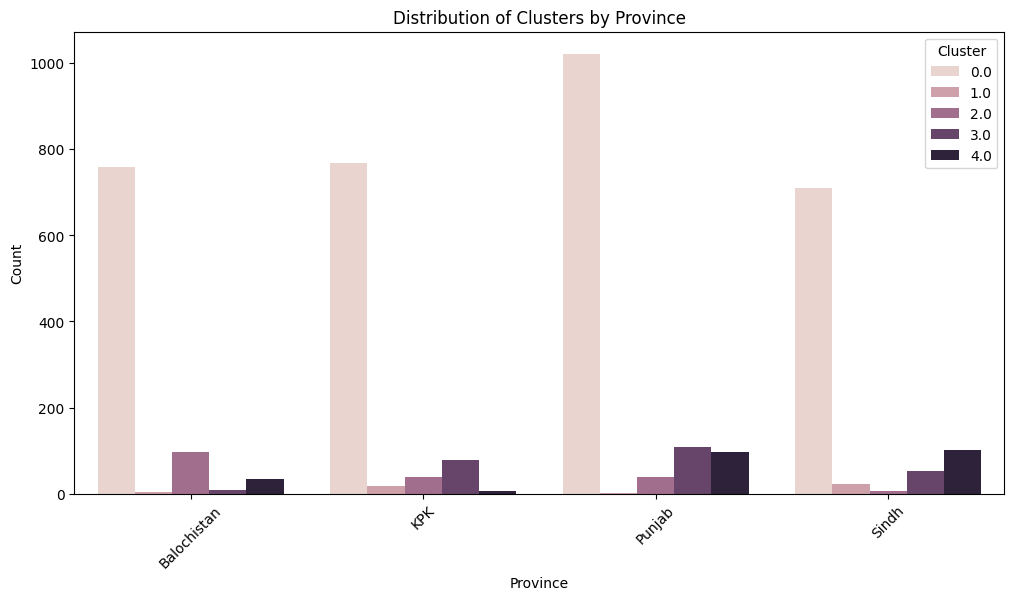

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Province', hue='Cluster')
plt.title('Distribution of Clusters by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   4730 non-null   object 
 1   Division   4730 non-null   object 
 2   District   4730 non-null   object 
 3   Indicator  4730 non-null   object 
 4   Area Type  4730 non-null   object 
 5   Total      4730 non-null   object 
 6   Male       4387 non-null   float64
 7   Female     3985 non-null   float64
 8   Cluster    3963 non-null   float64
dtypes: float64(3), object(6)
memory usage: 332.7+ KB


<Figure size 1200x600 with 0 Axes>

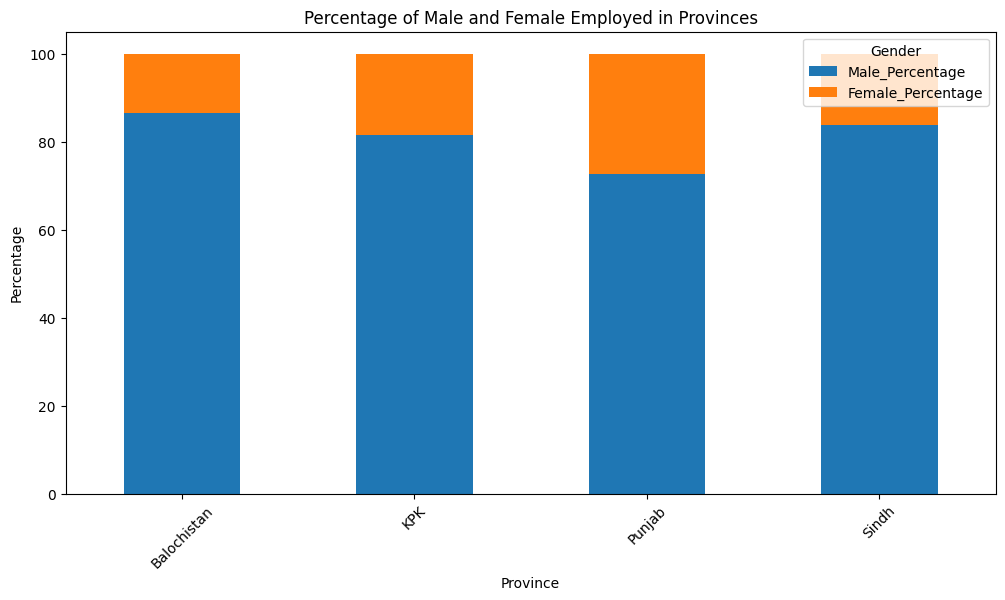

In [21]:
# Calculate the total number of employed people in each province
total_employed = employment_data.groupby('Province')[['Male', 'Female']].sum()

# Calculate the percentage of male and female employed in each province
total_employed['Total'] = total_employed['Male'] + total_employed['Female']
total_employed['Male_Percentage'] = (total_employed['Male'] / total_employed['Total']) * 100
total_employed['Female_Percentage'] = (total_employed['Female'] / total_employed['Total']) * 100

# Plot the percentage of male and female employed in each province
plt.figure(figsize=(12, 6))
total_employed[['Male_Percentage', 'Female_Percentage']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Male and Female Employed in Provinces')
plt.xlabel('Province')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<Figure size 1200x600 with 0 Axes>

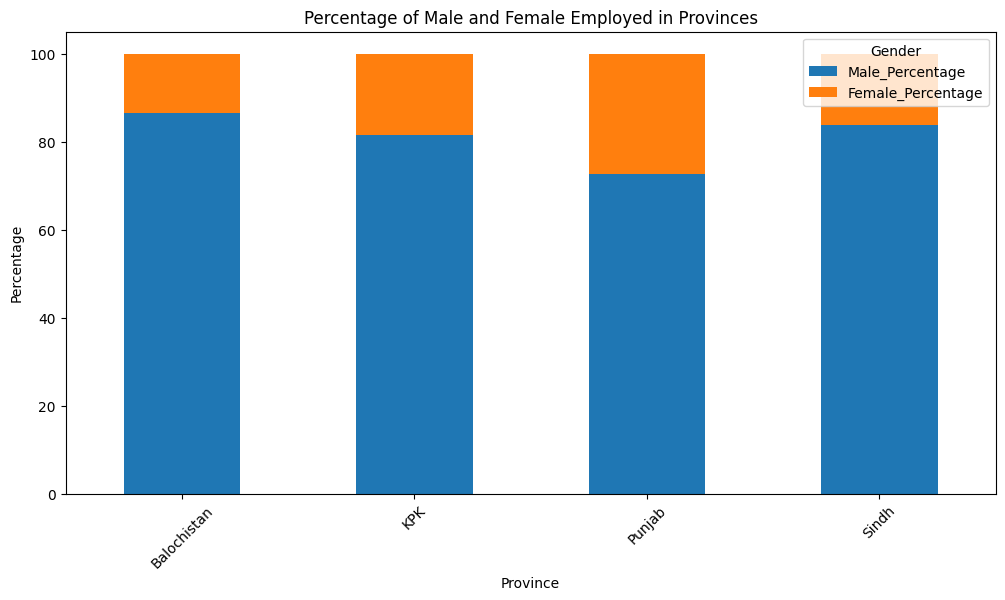

In [22]:
# Calculate the total number of employed people in each province
total_employed = employment_data.groupby('Province')[['Male', 'Female']].sum()

# Calculate the percentage of male and female employed in each province
total_employed['Total'] = total_employed['Male'] + total_employed['Female']
total_employed['Male_Percentage'] = (total_employed['Male'] / total_employed['Total']) * 100
total_employed['Female_Percentage'] = (total_employed['Female'] / total_employed['Total']) * 100

# Plot the percentage of male and female employed in each province
plt.figure(figsize=(12, 6))
total_employed[['Male_Percentage', 'Female_Percentage']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Male and Female Employed in Provinces')
plt.xlabel('Province')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()